PART 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers

from tensorflow.keras.utils import to_categorical

In [3]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Rescaling, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

from tensorflow.keras.optimizers import SGD

Mounting drive to colab to access the drive files

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Data is of images divided between real and fake faces. Following code accesses the data and 70% is assigned to training set. Mini batch size of 32 is taken.
dataset_train=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Deep Learning/Faces/real_and_fake_face',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(100, 100),
    shuffle=True,
    seed=233,
    validation_split=0.3,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
  
)

Found 2041 files belonging to 2 classes.
Using 1429 files for training.


In [6]:
# The other 30% of the images are assigned validation set
dataset_validation=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Deep Learning/Faces/real_and_fake_face',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(100, 100),
    shuffle=True,
    seed=233,
    validation_split=0.3,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
  
)

Found 2041 files belonging to 2 classes.
Using 612 files for validation.


In [7]:
for images, lables in dataset_train:
  print(images.shape)
  print(lables.shape)
  break

(32, 100, 100, 3)
(32,)


In [8]:
for images, lables in dataset_validation:
  print(images.shape)
  print(lables.shape)
  break

(32, 100, 100, 3)
(32,)


The above code produces shape of the images and labels. There are 32 images in a given batch with 100x100 pixels and 3 channels RGB. They are in tensor format

In [9]:
classes=dataset_train.class_names
classes # 2 associated classes, fake and real

['Fake', 'Real']

Class assigned:  Real


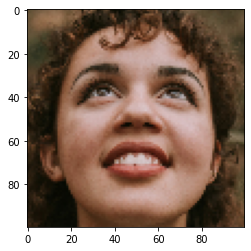

In [10]:
for images, labels in dataset_train:
  plt.imshow(images[0].numpy().astype("uint8")) # visualising the first image
  print('Class assigned: ', classes[labels[0]]) # class assigned
  break


Creating the model (1 C+P)

In [11]:
model=Sequential()
# scaling the model to bring it in the same range
model.add(Rescaling(1./255, input_shape=(100, 100, 3)))

# Convolution layer with 16 3x3 filters where 3x3 is the filter size, relu activation function and valid padding
model.add((Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3),padding='valid')))

# Max poooling layer of 2x2 and valid padding
model.add(MaxPooling2D((2, 2),padding='valid'))

# flattening the remaining features as inputs to MLP layer
model.add(Flatten())

# Hidden layer
model.add(Dense(50, activation='relu'))

# Output layer
model.add(Dense(len(classes)))

In [12]:
# specifying the optimizer as Adam which is an advanced form of stochastic gradient descent used to reduce the loss.
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 38416)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                1920850   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 102       
Total params: 1,921,400
Trainable params: 1,921,400
Non-trainable params: 0
______________________________________________

In [14]:
history=model.fit(dataset_train,epochs=10,validation_data=dataset_validation)
history

Epoch 1/10
45/45 [==============================] - 255s 6s/step - loss: 0.8257 - accuracy: 0.5213 - val_loss: 0.6907 - val_accuracy: 0.5278
Epoch 2/10
45/45 [==============================] - 21s 428ms/step - loss: 0.6480 - accuracy: 0.6431 - val_loss: 0.6597 - val_accuracy: 0.6209
Epoch 3/10
45/45 [==============================] - 21s 423ms/step - loss: 0.5578 - accuracy: 0.7299 - val_loss: 0.6659 - val_accuracy: 0.6111
Epoch 4/10
45/45 [==============================] - 21s 422ms/step - loss: 0.4776 - accuracy: 0.7803 - val_loss: 0.6856 - val_accuracy: 0.6193
Epoch 5/10
45/45 [==============================] - 21s 430ms/step - loss: 0.3797 - accuracy: 0.8537 - val_loss: 0.7012 - val_accuracy: 0.6095
Epoch 6/10
45/45 [==============================] - 21s 429ms/step - loss: 0.2869 - accuracy: 0.9006 - val_loss: 0.7784 - val_accuracy: 0.6111
Epoch 7/10
45/45 [==============================] - 21s 425ms/step - loss: 0.2248 - accuracy: 0.9342 - val_loss: 0.8019 - val_accuracy: 0.5964
E

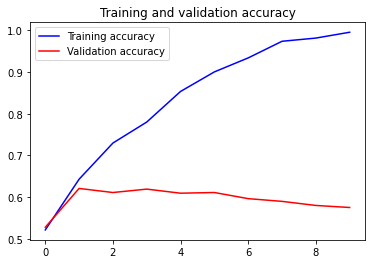

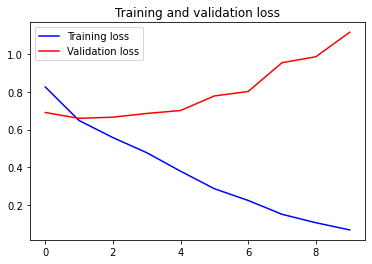

In [15]:
# Visualising the performance
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The training and testing performance doesn't seem to chnage with 1 C+P layer

Modelling with 2 C+P layers

In [16]:
model=Sequential()
model.add(Rescaling(1./255, input_shape=(100, 100, 3)))
model.add((Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3),padding='valid')))
model.add(MaxPooling2D((2, 2),padding='valid'))
model.add((Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3),padding='valid')))
model.add(MaxPooling2D((2, 2),padding='valid'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(len(classes)))

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8464)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)               

In [17]:
history=model.fit(dataset_train,epochs=10,validation_data=dataset_validation)
history

Epoch 1/10
45/45 [==============================] - 24s 485ms/step - loss: 0.7380 - accuracy: 0.5136 - val_loss: 0.6928 - val_accuracy: 0.5294
Epoch 2/10
45/45 [==============================] - 23s 482ms/step - loss: 0.6925 - accuracy: 0.5297 - val_loss: 0.6923 - val_accuracy: 0.5294
Epoch 3/10
45/45 [==============================] - 23s 481ms/step - loss: 0.6921 - accuracy: 0.5297 - val_loss: 0.6920 - val_accuracy: 0.5294
Epoch 4/10
45/45 [==============================] - 23s 482ms/step - loss: 0.6919 - accuracy: 0.5297 - val_loss: 0.6917 - val_accuracy: 0.5294
Epoch 5/10
45/45 [==============================] - 23s 476ms/step - loss: 0.6917 - accuracy: 0.5297 - val_loss: 0.6917 - val_accuracy: 0.5294
Epoch 6/10
45/45 [==============================] - 23s 482ms/step - loss: 0.6916 - accuracy: 0.5297 - val_loss: 0.6916 - val_accuracy: 0.5294
Epoch 7/10
45/45 [==============================] - 24s 488ms/step - loss: 0.6915 - accuracy: 0.5297 - val_loss: 0.6915 - val_accuracy: 0.5294

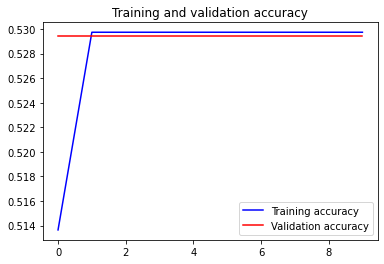

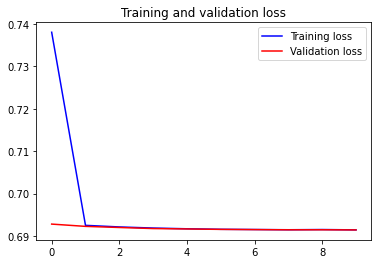

In [18]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Modelling with dropouts (1 C+P)

In [68]:
model=Sequential()
model.add(Rescaling(1./255, input_shape=(100, 100, 3)))
model.add((Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3),padding='valid')))
model.add(MaxPooling2D((2, 2),padding='valid'))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(classes)))

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.summary()



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_9 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 49, 49, 16)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 38416)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 50)                1920850   
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 2)                

In [69]:
history=model.fit(dataset_train,epochs=10,validation_data=dataset_validation)
history

Epoch 1/10
45/45 [==============================] - 21s 426ms/step - loss: 0.8503 - accuracy: 0.4857 - val_loss: 0.6924 - val_accuracy: 0.5098
Epoch 2/10
45/45 [==============================] - 20s 416ms/step - loss: 0.6878 - accuracy: 0.5598 - val_loss: 0.6872 - val_accuracy: 0.5686
Epoch 3/10
45/45 [==============================] - 21s 427ms/step - loss: 0.6685 - accuracy: 0.5892 - val_loss: 0.6682 - val_accuracy: 0.6029
Epoch 4/10
45/45 [==============================] - 21s 423ms/step - loss: 0.6193 - accuracy: 0.6410 - val_loss: 0.6616 - val_accuracy: 0.6307
Epoch 5/10
45/45 [==============================] - 21s 422ms/step - loss: 0.5601 - accuracy: 0.6977 - val_loss: 0.6809 - val_accuracy: 0.6242
Epoch 6/10
45/45 [==============================] - 21s 430ms/step - loss: 0.5000 - accuracy: 0.7586 - val_loss: 0.6806 - val_accuracy: 0.5980
Epoch 7/10
45/45 [==============================] - 22s 443ms/step - loss: 0.4227 - accuracy: 0.8090 - val_loss: 0.7066 - val_accuracy: 0.5997

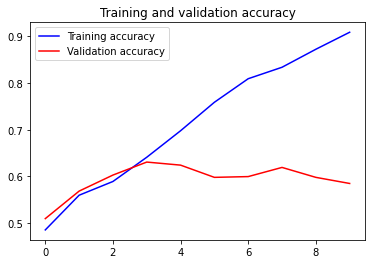

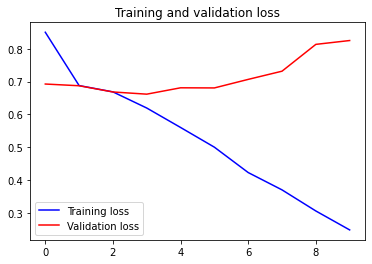

In [70]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [71]:
predictions=model.predict(dataset_validation)
predictions

array([[-0.85649484,  0.8337314 ],
       [-1.4212052 ,  1.6327319 ],
       [ 1.2315379 , -0.21865025],
       ...,
       [-0.9058991 ,  1.5263433 ],
       [-0.06577702,  1.0285088 ],
       [ 2.4398186 , -0.43765935]], dtype=float32)

In [72]:
y_pred=np.argmax(predictions, axis=1)
y_pred # predicted labels

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,

In [73]:
labels= tf.concat([y for x,y in dataset_validation], axis=0)
labels # true labels

<tf.Tensor: shape=(612,), dtype=int32, numpy=
array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
     

In [74]:
from sklearn.metrics import classification_report

print(classification_report(labels, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.46      0.45       288
           1       0.50      0.48      0.49       324

    accuracy                           0.47       612
   macro avg       0.47      0.47      0.47       612
weighted avg       0.48      0.47      0.47       612



Modelling with batch normalization (1 C+P)

Batch normalization is done after the convolution layer. It rescales the outputs in the same range since filter application and relu activation function disrupts the output

In [19]:
model=Sequential()
model.add(Rescaling(1./255, input_shape=(100, 100, 3)))
model.add((Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3),padding='valid')))
model.add(MaxPooling2D((2, 2),padding='valid'))
model.add(BatchNormalization(axis=-1))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(len(classes)))

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 49, 49, 16)        64        
_________________________________________________________________
flatten_2 (Flatten)          (None, 38416)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                1920850   
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [20]:
history=model.fit(dataset_train,epochs=10,validation_data=dataset_validation)
history

Epoch 1/10
45/45 [==============================] - 22s 446ms/step - loss: 1.7796 - accuracy: 0.5339 - val_loss: 0.7060 - val_accuracy: 0.4837
Epoch 2/10
45/45 [==============================] - 22s 441ms/step - loss: 0.7263 - accuracy: 0.6137 - val_loss: 0.7047 - val_accuracy: 0.5310
Epoch 3/10
45/45 [==============================] - 22s 444ms/step - loss: 0.5907 - accuracy: 0.6802 - val_loss: 0.6806 - val_accuracy: 0.5899
Epoch 4/10
45/45 [==============================] - 22s 442ms/step - loss: 0.4286 - accuracy: 0.7810 - val_loss: 0.6769 - val_accuracy: 0.5752
Epoch 5/10
45/45 [==============================] - 21s 440ms/step - loss: 0.2870 - accuracy: 0.8593 - val_loss: 0.6812 - val_accuracy: 0.5915
Epoch 6/10
45/45 [==============================] - 23s 463ms/step - loss: 0.1789 - accuracy: 0.9230 - val_loss: 0.7373 - val_accuracy: 0.5735
Epoch 7/10
45/45 [==============================] - 23s 466ms/step - loss: 0.0870 - accuracy: 0.9678 - val_loss: 0.7571 - val_accuracy: 0.5784

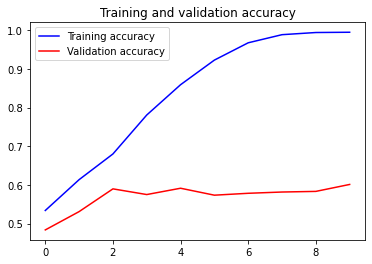

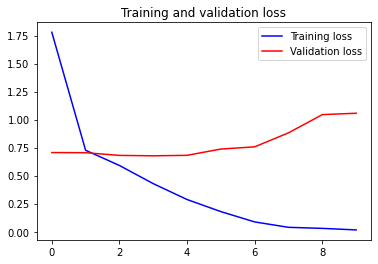

In [21]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
predictions=model.predict(dataset_validation)
predictions

array([[2.3763359, 3.215425 ],
       [4.333828 , 4.308762 ],
       [7.949522 , 7.086776 ],
       ...,
       [4.447418 , 4.2953224],
       [3.6638775, 4.9718   ],
       [9.911603 , 8.359301 ]], dtype=float32)

In [23]:
y_pred=np.argmax(predictions, axis=1)
y_pred # predicted labels

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [24]:
labels= tf.concat([y for x,y in dataset_validation], axis=0)
labels # true labels

<tf.Tensor: shape=(612,), dtype=int32, numpy=
array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
     

In [25]:
from sklearn.metrics import classification_report

print(classification_report(labels, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.39      0.43       288
           1       0.53      0.62      0.57       324

    accuracy                           0.51       612
   macro avg       0.50      0.50      0.50       612
weighted avg       0.50      0.51      0.50       612



Using same Padding

With same padding, padding on input is done such that upon filter application, output is of exactly the same size as input. This way corner of the image also gets exposed to the central part of the filter

In [26]:
model=Sequential()
model.add(Rescaling(1./255, input_shape=(100, 100, 3)))
model.add((Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3),padding='same')))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(len(classes)))

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 16)        64        
_________________________________________________________________
flatten_3 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2000050   
_________________________________________________________________
dense_7 (Dense)              (None, 2)                

In [27]:
history=model.fit(dataset_train,epochs=10,validation_data=dataset_validation)
history

Epoch 1/10
45/45 [==============================] - 23s 457ms/step - loss: 1.3912 - accuracy: 0.5402 - val_loss: 1.4290 - val_accuracy: 0.4673
Epoch 2/10
45/45 [==============================] - 22s 450ms/step - loss: 0.6668 - accuracy: 0.5472 - val_loss: 0.7436 - val_accuracy: 0.5065
Epoch 3/10
45/45 [==============================] - 22s 454ms/step - loss: 0.6345 - accuracy: 0.5682 - val_loss: 0.7694 - val_accuracy: 0.5752
Epoch 4/10
45/45 [==============================] - 22s 451ms/step - loss: 0.5626 - accuracy: 0.6830 - val_loss: 0.7094 - val_accuracy: 0.5670
Epoch 5/10
45/45 [==============================] - 22s 454ms/step - loss: 0.4797 - accuracy: 0.7516 - val_loss: 0.6925 - val_accuracy: 0.5997
Epoch 6/10
45/45 [==============================] - 22s 460ms/step - loss: 0.3904 - accuracy: 0.8153 - val_loss: 0.7463 - val_accuracy: 0.5964
Epoch 7/10
45/45 [==============================] - 22s 450ms/step - loss: 0.2742 - accuracy: 0.8733 - val_loss: 0.7937 - val_accuracy: 0.5817

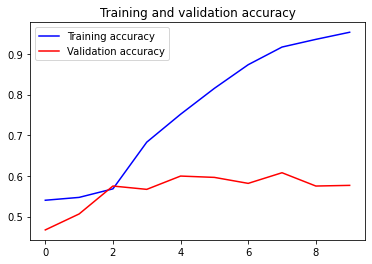

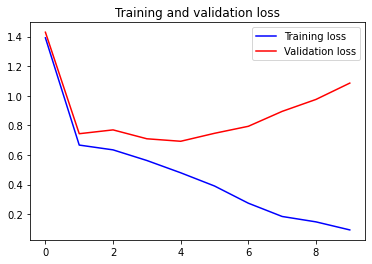

In [28]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
predictions=model.predict(dataset_validation)
predictions

array([[ 0.6282478 , -0.37999225],
       [ 2.4322202 ,  4.8164396 ],
       [-0.27347553,  3.104682  ],
       ...,
       [ 0.8214321 ,  0.06358039],
       [ 0.5842271 ,  4.5580993 ],
       [-2.1628    ,  5.699512  ]], dtype=float32)

In [30]:
y_pred=np.argmax(predictions, axis=1)
y_pred # predicted labels

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,

In [31]:
labels= tf.concat([y for x,y in dataset_validation], axis=0)
labels # true labels

<tf.Tensor: shape=(612,), dtype=int32, numpy=
array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
     

In [32]:
from sklearn.metrics import classification_report

print(classification_report(labels, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.30      0.36       288
           1       0.52      0.67      0.58       324

    accuracy                           0.50       612
   macro avg       0.48      0.48      0.47       612
weighted avg       0.48      0.50      0.48       612



Increasing number of filters

Increasing the number of filters helps us achieve more feature maps from the convolution process. Usually, if more than 1 C+P layers are used, filters are increased after every C+P layer because our area of interest starts to narrow down and we start moving towards high level features

In [33]:
# 32 filters taken

model=Sequential()
model.add(Rescaling(1./255, input_shape=(100, 100, 3)))
model.add((Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3),padding='valid')))
model.add(MaxPooling2D((2, 2),padding='valid'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(len(classes)))

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 76832)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                3841650   
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 102       
Total params: 3,842,648
Trainable params: 3,842,648
Non-trainable params: 0
____________________________________________

In [34]:
history=model.fit(dataset_train,epochs=10,validation_data=dataset_validation)
history

Epoch 1/10
45/45 [==============================] - 24s 495ms/step - loss: 1.4111 - accuracy: 0.4871 - val_loss: 0.6935 - val_accuracy: 0.4706
Epoch 2/10
45/45 [==============================] - 24s 492ms/step - loss: 0.6933 - accuracy: 0.4822 - val_loss: 0.6930 - val_accuracy: 0.5294
Epoch 3/10
45/45 [==============================] - 24s 493ms/step - loss: 0.6928 - accuracy: 0.5297 - val_loss: 0.6925 - val_accuracy: 0.5294
Epoch 4/10
45/45 [==============================] - 24s 485ms/step - loss: 0.6924 - accuracy: 0.5297 - val_loss: 0.6922 - val_accuracy: 0.5294
Epoch 5/10
45/45 [==============================] - 24s 489ms/step - loss: 0.6921 - accuracy: 0.5297 - val_loss: 0.6920 - val_accuracy: 0.5294
Epoch 6/10
45/45 [==============================] - 23s 484ms/step - loss: 0.6918 - accuracy: 0.5297 - val_loss: 0.6918 - val_accuracy: 0.5294
Epoch 7/10
45/45 [==============================] - 24s 486ms/step - loss: 0.6917 - accuracy: 0.5297 - val_loss: 0.6916 - val_accuracy: 0.5294

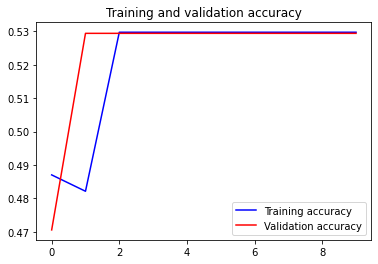

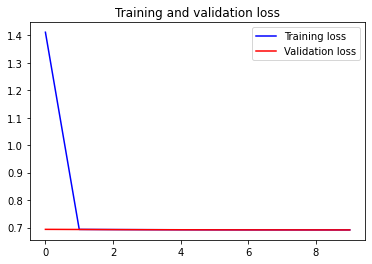

In [35]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [36]:
predictions=model.predict(dataset_validation)
predictions

array([[-0.04955127,  0.04955127],
       [-0.04955127,  0.04955127],
       [-0.04955127,  0.04955127],
       ...,
       [-0.04955127,  0.04955127],
       [-0.04955127,  0.04955127],
       [-0.04955127,  0.04955127]], dtype=float32)

In [37]:
y_pred=np.argmax(predictions, axis=1)
y_pred # predicted labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [38]:
labels= tf.concat([y for x,y in dataset_validation], axis=0)
labels # true labels

<tf.Tensor: shape=(612,), dtype=int32, numpy=
array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
     

In [39]:
from sklearn.metrics import classification_report

print(classification_report(labels, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       288
           1       0.53      1.00      0.69       324

    accuracy                           0.53       612
   macro avg       0.26      0.50      0.35       612
weighted avg       0.28      0.53      0.37       612



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Changing pooling sizes

In [40]:
# 4x4 pooling size used

model=Sequential()
model.add(Rescaling(1./255, input_shape=(100, 100, 3)))
model.add((Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3),padding='valid')))
model.add(MaxPooling2D((4, 4),padding='valid'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(len(classes)))

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.summary()



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 50)                921650    
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 102       
Total params: 922,648
Trainable params: 922,648
Non-trainable params: 0
________________________________________________

In [41]:
history=model.fit(dataset_train,epochs=10,validation_data=dataset_validation)
history

Epoch 1/10
45/45 [==============================] - 23s 456ms/step - loss: 0.8061 - accuracy: 0.4899 - val_loss: 0.6897 - val_accuracy: 0.5245
Epoch 2/10
45/45 [==============================] - 22s 448ms/step - loss: 0.6630 - accuracy: 0.6060 - val_loss: 0.6652 - val_accuracy: 0.5948
Epoch 3/10
45/45 [==============================] - 22s 451ms/step - loss: 0.6299 - accuracy: 0.6459 - val_loss: 0.6526 - val_accuracy: 0.6209
Epoch 4/10
45/45 [==============================] - 22s 450ms/step - loss: 0.5944 - accuracy: 0.6935 - val_loss: 0.6685 - val_accuracy: 0.6144
Epoch 5/10
45/45 [==============================] - 22s 451ms/step - loss: 0.5703 - accuracy: 0.7040 - val_loss: 0.6550 - val_accuracy: 0.6389
Epoch 6/10
45/45 [==============================] - 22s 457ms/step - loss: 0.5316 - accuracy: 0.7362 - val_loss: 0.7415 - val_accuracy: 0.5735
Epoch 7/10
45/45 [==============================] - 22s 451ms/step - loss: 0.5102 - accuracy: 0.7656 - val_loss: 0.7179 - val_accuracy: 0.5980

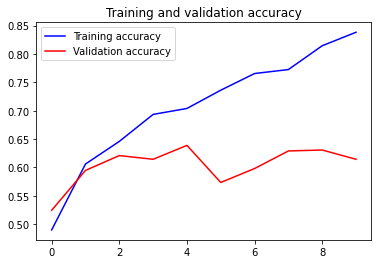

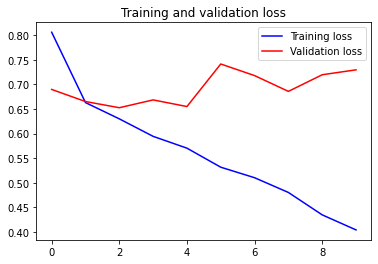

In [42]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [43]:
predictions=model.predict(dataset_validation)
predictions

array([[0.6953259 , 1.3789717 ],
       [2.303238  , 0.80083597],
       [0.54255587, 1.1456015 ],
       ...,
       [3.9638205 , 1.2140912 ],
       [2.6107914 , 0.91839063],
       [2.549753  , 1.1446352 ]], dtype=float32)

In [44]:
y_pred=np.argmax(predictions, axis=1)
y_pred # predicted labels

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,

In [45]:
labels= tf.concat([y for x,y in dataset_validation], axis=0)
labels # true labels

<tf.Tensor: shape=(612,), dtype=int32, numpy=
array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
     

In [46]:
from sklearn.metrics import classification_report

print(classification_report(labels, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50       288
           1       0.54      0.50      0.52       324

    accuracy                           0.51       612
   macro avg       0.51      0.51      0.51       612
weighted avg       0.51      0.51      0.51       612



In [47]:
# 3x3 pooling size used

model=Sequential()
model.add(Rescaling(1./255, input_shape=(100, 100, 3)))
model.add((Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3),padding='valid')))
model.add(MaxPooling2D((4, 4),padding='valid'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(len(classes)))

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.summary()



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                921650    
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 102       
Total params: 922,648
Trainable params: 922,648
Non-trainable params: 0
________________________________________________

In [48]:
history=model.fit(dataset_train,epochs=10,validation_data=dataset_validation)
history

Epoch 1/10
45/45 [==============================] - 22s 444ms/step - loss: 0.9532 - accuracy: 0.5045 - val_loss: 0.6867 - val_accuracy: 0.5229
Epoch 2/10
45/45 [==============================] - 21s 439ms/step - loss: 0.6796 - accuracy: 0.5619 - val_loss: 0.6750 - val_accuracy: 0.5752
Epoch 3/10
45/45 [==============================] - 22s 457ms/step - loss: 0.6545 - accuracy: 0.6046 - val_loss: 0.6621 - val_accuracy: 0.6046
Epoch 4/10
45/45 [==============================] - 22s 448ms/step - loss: 0.6217 - accuracy: 0.6669 - val_loss: 0.6685 - val_accuracy: 0.5948
Epoch 5/10
45/45 [==============================] - 22s 453ms/step - loss: 0.5999 - accuracy: 0.6725 - val_loss: 0.6566 - val_accuracy: 0.6209
Epoch 6/10
45/45 [==============================] - 22s 459ms/step - loss: 0.5768 - accuracy: 0.6907 - val_loss: 0.6544 - val_accuracy: 0.6324
Epoch 7/10
45/45 [==============================] - 22s 454ms/step - loss: 0.5468 - accuracy: 0.7334 - val_loss: 0.6765 - val_accuracy: 0.6258

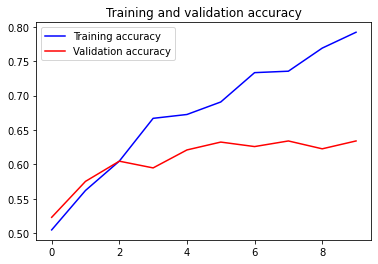

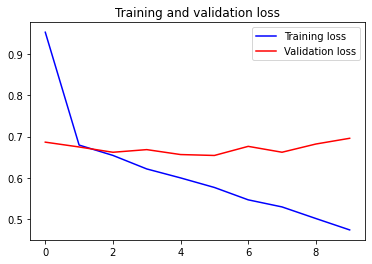

In [49]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [50]:
predictions=model.predict(dataset_validation)
predictions

array([[-0.34409633,  0.7937142 ],
       [-1.0034094 ,  1.2496697 ],
       [ 0.42548078,  0.36266446],
       ...,
       [ 0.08065148,  0.49834025],
       [-0.5950905 ,  0.8866752 ],
       [-0.80985725,  1.2185715 ]], dtype=float32)

In [51]:
y_pred=np.argmax(predictions, axis=1)
y_pred # predicted labels

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,

In [52]:
labels= tf.concat([y for x,y in dataset_validation], axis=0)
labels # true labels

<tf.Tensor: shape=(612,), dtype=int32, numpy=
array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
     

In [53]:
from sklearn.metrics import classification_report

print(classification_report(labels, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.36      0.40       288
           1       0.51      0.60      0.55       324

    accuracy                           0.49       612
   macro avg       0.48      0.48      0.48       612
weighted avg       0.48      0.49      0.48       612



Using Leaky Relu as activation function

In [54]:

model=Sequential()
model.add(Rescaling(1./255, input_shape=(100, 100, 3)))
model.add((Conv2D(16, kernel_size=(3, 3),activation=LeakyReLU(),input_shape=(100,100,3),padding='valid')))
model.add(MaxPooling2D((2, 2),padding='valid'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(len(classes)))

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.summary()



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_7 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 38416)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)                1920850   
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 102       
Total params: 1,921,400
Trainable params: 1,921,400
Non-trainable params: 0
____________________________________________

In [55]:
history=model.fit(dataset_train,epochs=10,validation_data=dataset_validation)
history

Epoch 1/10
45/45 [==============================] - 22s 444ms/step - loss: 1.1271 - accuracy: 0.5122 - val_loss: 0.6998 - val_accuracy: 0.5408
Epoch 2/10
45/45 [==============================] - 22s 441ms/step - loss: 0.6442 - accuracy: 0.6151 - val_loss: 0.6707 - val_accuracy: 0.5997
Epoch 3/10
45/45 [==============================] - 22s 454ms/step - loss: 0.5985 - accuracy: 0.6809 - val_loss: 0.6657 - val_accuracy: 0.6095
Epoch 4/10
45/45 [==============================] - 22s 447ms/step - loss: 0.5700 - accuracy: 0.6991 - val_loss: 0.6817 - val_accuracy: 0.6127
Epoch 5/10
45/45 [==============================] - 22s 442ms/step - loss: 0.5116 - accuracy: 0.7600 - val_loss: 0.6701 - val_accuracy: 0.6095
Epoch 6/10
45/45 [==============================] - 22s 446ms/step - loss: 0.4632 - accuracy: 0.8055 - val_loss: 0.6801 - val_accuracy: 0.6062
Epoch 7/10
45/45 [==============================] - 22s 441ms/step - loss: 0.4124 - accuracy: 0.8439 - val_loss: 0.6923 - val_accuracy: 0.6095

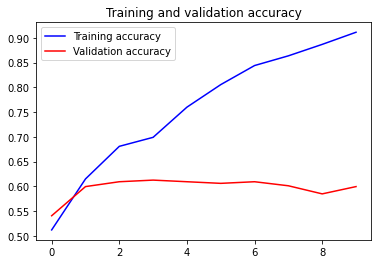

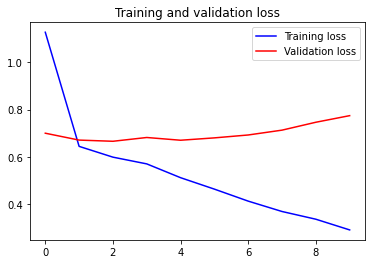

In [56]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [57]:
predictions=model.predict(dataset_validation)
predictions

array([[-0.5463776 ,  0.13435134],
       [-0.9035653 ,  0.20234625],
       [-0.7423772 ,  0.3332328 ],
       ...,
       [-1.5861123 ,  1.8872654 ],
       [-0.51643425, -0.2137201 ],
       [-0.77106917,  0.32009327]], dtype=float32)

In [58]:
y_pred=np.argmax(predictions, axis=1)
y_pred # predicted labels

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,

In [59]:
labels= tf.concat([y for x,y in dataset_validation], axis=0)
labels # true labels

<tf.Tensor: shape=(612,), dtype=int32, numpy=
array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
     

In [60]:
from sklearn.metrics import classification_report

print(classification_report(labels, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.31      0.36       288
           1       0.51      0.64      0.57       324

    accuracy                           0.49       612
   macro avg       0.47      0.48      0.47       612
weighted avg       0.47      0.49      0.47       612



Changing strides

In [61]:
# using stride of 2

model=Sequential()
model.add(Rescaling(1./255, input_shape=(100, 100, 3)))
model.add((Conv2D(16, kernel_size=(3, 3),strides=(2,2),activation=LeakyReLU(),input_shape=(100,100,3),padding='valid')))
model.add(MaxPooling2D((2, 2),padding='valid'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(len(classes)))

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.summary()



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_8 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 49, 49, 16)        448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 50)                460850    
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 102       
Total params: 461,400
Trainable params: 461,400
Non-trainable params: 0
________________________________________________

In [62]:
history=model.fit(dataset_train,epochs=10,validation_data=dataset_validation)
history

Epoch 1/10
45/45 [==============================] - 17s 321ms/step - loss: 0.8600 - accuracy: 0.5234 - val_loss: 0.6926 - val_accuracy: 0.5310
Epoch 2/10
45/45 [==============================] - 16s 320ms/step - loss: 0.6928 - accuracy: 0.5192 - val_loss: 0.6922 - val_accuracy: 0.5294
Epoch 3/10
45/45 [==============================] - 16s 321ms/step - loss: 0.6921 - accuracy: 0.5297 - val_loss: 0.6920 - val_accuracy: 0.5294
Epoch 4/10
45/45 [==============================] - 16s 322ms/step - loss: 0.6919 - accuracy: 0.5297 - val_loss: 0.6918 - val_accuracy: 0.5294
Epoch 5/10
45/45 [==============================] - 16s 323ms/step - loss: 0.6917 - accuracy: 0.5297 - val_loss: 0.6917 - val_accuracy: 0.5294
Epoch 6/10
45/45 [==============================] - 16s 322ms/step - loss: 0.6916 - accuracy: 0.5297 - val_loss: 0.6916 - val_accuracy: 0.5294
Epoch 7/10
45/45 [==============================] - 16s 326ms/step - loss: 0.6915 - accuracy: 0.5297 - val_loss: 0.6915 - val_accuracy: 0.5294

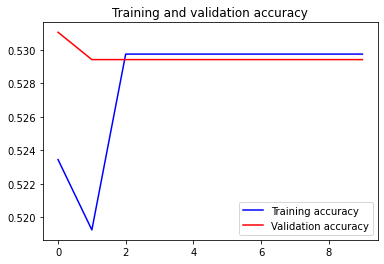

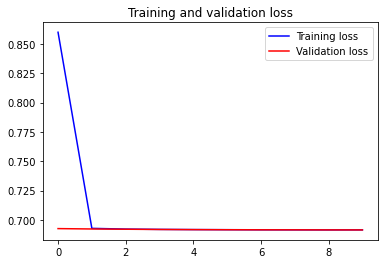

In [63]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [64]:
predictions=model.predict(dataset_validation)
predictions

array([[-0.05289609,  0.05289609],
       [-0.05289609,  0.05289609],
       [-0.05289609,  0.05289609],
       ...,
       [-0.05289609,  0.05289609],
       [-0.05289609,  0.05289609],
       [-0.05289609,  0.05289609]], dtype=float32)

In [65]:
y_pred=np.argmax(predictions, axis=1)
y_pred # predicted labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [66]:
labels= tf.concat([y for x,y in dataset_validation], axis=0)
labels # true labels

<tf.Tensor: shape=(612,), dtype=int32, numpy=
array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
     

In [67]:
from sklearn.metrics import classification_report

print(classification_report(labels, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       288
           1       0.53      1.00      0.69       324

    accuracy                           0.53       612
   macro avg       0.26      0.50      0.35       612
weighted avg       0.28      0.53      0.37       612



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
